In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import seaborn as sbn
import random

df = pd.read_csv("../tabulee/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [204]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Visualisation avec matplotlib

## figures et subplots

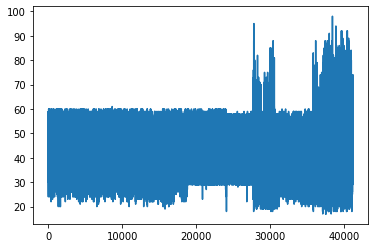

In [8]:
plt.plot(df["age"])
plt.show()

- L'appelle à show n'est pas necessaire dans un notebook après le plot
- Si une seul liste est passé, l'absisse sera la place dans la liste
    - permet de voir que mon dataset est trié
    - le comprend comme une série temporelle et relie donc les points

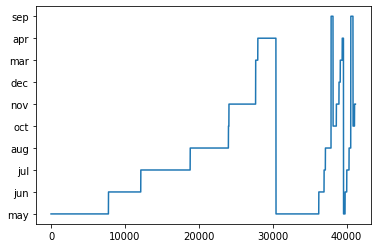

In [9]:
plt.plot(df["month"])
plt.show()

- Il faut maintenant rajouter une légende et un titre au graphe

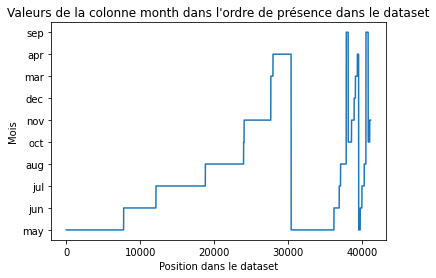

In [15]:
plt.plot(df["month"])
plt.title("Valeurs de la colonne month dans l'ordre de présence dans le dataset")
plt.xlabel("Position dans le dataset")
plt.ylabel("Mois")
plt.show()

- Modifions sa taille pour mieux utiliser l'espace disponible dans un notebook:

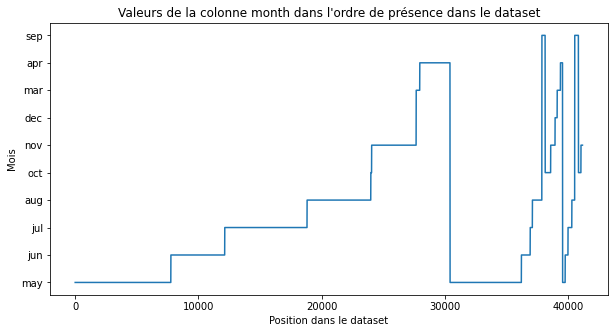

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df["month"])
plt.title("Valeurs de la colonne month dans l'ordre de présence dans le dataset")
plt.xlabel("Position dans le dataset")
plt.ylabel("Mois")
plt.show()

### Subplots

Comment mettre cote à cote ce graphe à celui de la colonne age, par exemple pour voir si les pics arrivent au mêmes moments ?
- sur le même graphe :

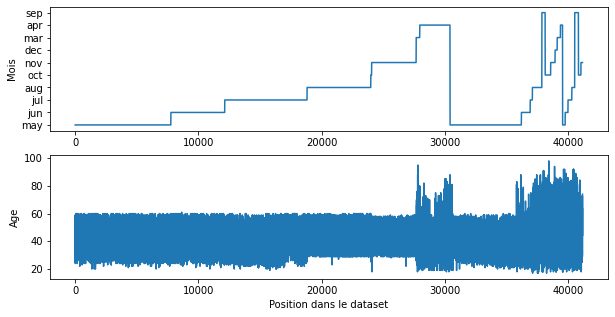

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(df["month"])
plt.ylabel("Mois")
plt.subplot(2,1,2)
plt.plot(df["age"])
plt.ylabel("Age")
plt.xlabel("Position dans le dataset")
plt.show()

- les deux premiers parametres de subplot indiquent le quadrillage
- le 3eme indique la place du graphe dans ce quadrillage
- chaque subplot fonctionne comme un graphe à part entiere, avec toutes les méthodes correspondantes

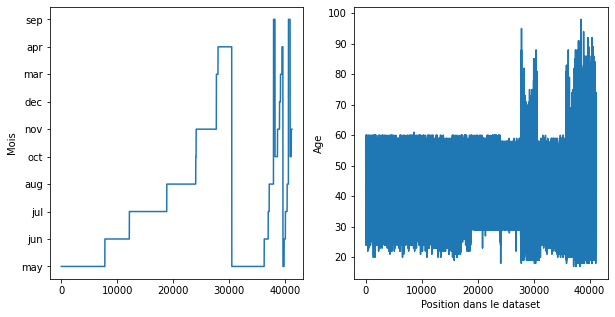

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df["month"])
plt.ylabel("Mois")
plt.subplot(1,2,2)
plt.plot(df["age"])
plt.ylabel("Age")
plt.xlabel("Position dans le dataset")
plt.show()

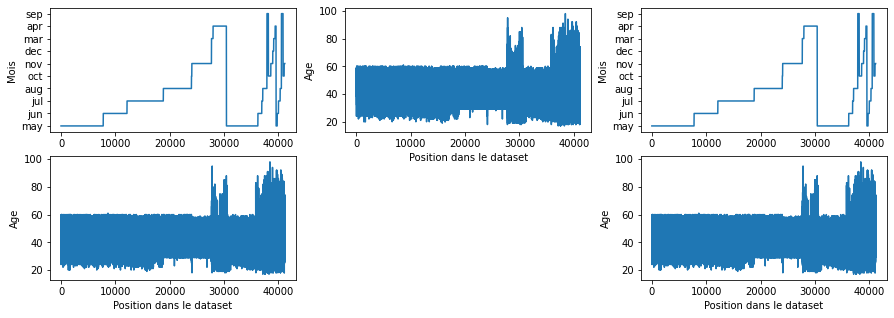

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.plot(df["month"])
plt.ylabel("Mois")
plt.subplot(2,3,2)
plt.plot(df["age"])
plt.xlabel("Position dans le dataset")
plt.ylabel("Age")
plt.subplot(2,3,3)
plt.plot(df["month"])
plt.ylabel("Mois")
plt.subplot(2,3,4)
plt.xlabel("Position dans le dataset")
plt.plot(df["age"])
plt.ylabel("Age")
plt.subplot(2,3,6)
plt.plot(df["age"])
plt.ylabel("Age")
plt.xlabel("Position dans le dataset")
plt.show()

## Les images avec matplotlib

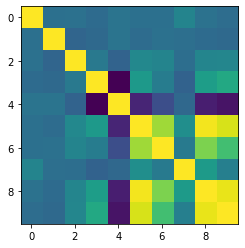

In [50]:
my_img = df.corr()
plt.imshow(my_img)

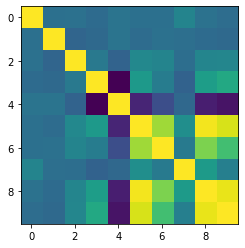

In [52]:
my_img2 = 0.5*my_img
plt.imshow(my_img2)

- matplotlib normalise la plage de couleur entre la valeur minimale et maximale
- nous n'avons donc aucune idée à quelles valeurs correspondent les couleurs
- Comment connaitre la correspondance exacte ?

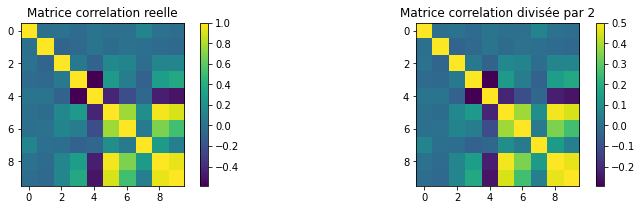

In [90]:
fig, (ax1, ax2) = plt.subplots(figsize=(13, 3), ncols=2)

pos1 = ax1.imshow(my_img)
pos2 = ax2.imshow(my_img2)
plt.colorbar(pos1, ax=ax1)
plt.colorbar(pos2, ax=ax2)
ax1.set_title("Matrice correlation reelle")
ax2.set_title("Matrice correlation divisée par 2")
plt.show()

Avant j'utilisais 'plt.', et maintenant je manipule des objets ax1, ... Qu'est ce qu'il se passe ?
- Matplotlib fonctionne avec deux notions, celle de __figure__ , et celle de __graphe__ (ax)
- Une figure peut contenir plusieurs graphes. Les __subplots__ sont des __graphes__ de la figure affichée lors du show().
    - plt.subplots(figsize=(13, 3), ncols=2) a partagé la figure en deux emplacements de graphes que j'ai rempli
- par défault, 'plt.' va chercher la figure actuelle, et appelle la méthode de celle-ci
    - j'aurais pu donc remplacer 'plt.' par 'fig.' dans la figure ci-dessus
- certaines méthodes ne sont disponibles qu'au niveau des graphes, comme mes set_title.
    - manipuler les graphes permet généralement d'être plus précis et a plus d'options

- la colorbar est elle-même formée par un graphe manipulable et donc modifiable

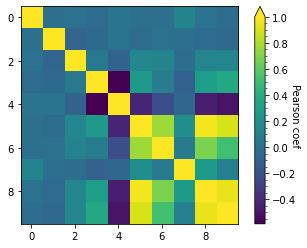

In [112]:
plt.imshow(my_img)
cbar = plt.colorbar(extend='max')
cbar.minorticks_on()
cbar.ax.set_ylabel('Pearson coef', rotation=270)
plt.show()

### Les colorsmap

- Le mapping entre valeur et couleur est appelée par matplotlib colormap
- il y a __differents types__ de colormap, et tous ne sont pas adapté au même __usage__

##### Les mappings séquentiels

- le mapping est monotone, c'est la luminosité qui varie avec la valeur
    - utile pour visualiser des valeurs ordonnées
    - certaines vont varier la luminosité sur des intervalles plus grands que d'autres

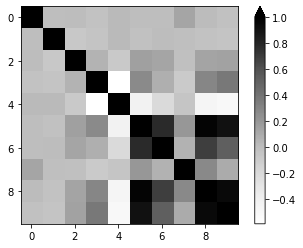

In [114]:
plt.imshow(df.corr(),cmap='Greys')
cbar = plt.colorbar(extend='max')

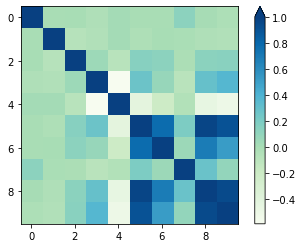

In [115]:
plt.imshow(df.corr(),cmap='GnBu')
cbar = plt.colorbar(extend='max')

##### Les mappings divergents
- Deux couleurs aux extrémités de valeur qui se mélangent à la valeur du milieu
- Ils sont fait pour visualiser principalement les valeurs dans leur plage centrales
- A utiliser quand le détail des valeurs du mileu de la plage de valeur sont à détailler
- L'ordre 'logique' entre extremums n'est pas visuellement évident

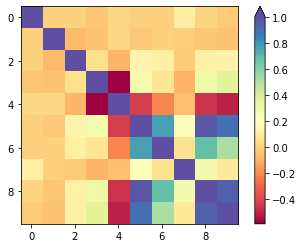

In [122]:
plt.imshow(df.corr(),cmap='Spectral')
cbar = plt.colorbar(extend='max')

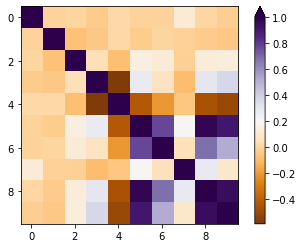

In [123]:
plt.imshow(df.corr(),cmap='PuOr')
cbar = plt.colorbar(extend='max')

##### Les mappings qualitatifs
- les couleurs sont choisies pour être visuellement très différentes
- Utilisées pour visualiser des variables catégorielles, non ordonnées 

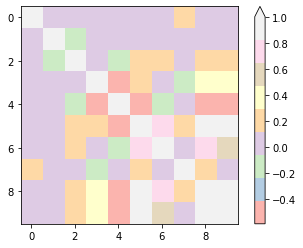

In [95]:
plt.imshow(df.corr(),cmap='Pastel1')
cbar = plt.colorbar(extend='max')

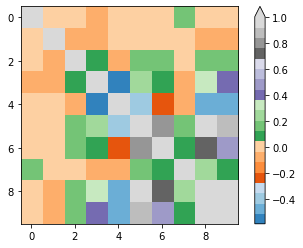

In [128]:
plt.imshow(df.corr(),cmap='tab20c')
cbar = plt.colorbar(extend='max')

##### Les mappings cycliques
- pour visualiser des valeurs cycliques, comme des mois, heures
- utile pour les corrélations comme -1 et 1 indiquent tout deux des corrélations

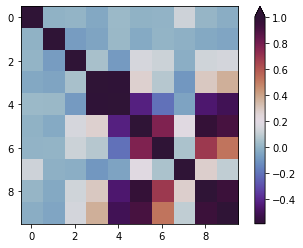

In [132]:
plt.imshow(df.corr(),cmap='twilight_shifted')
cbar = plt.colorbar(extend='max')

- Il y a plusieurs dizaines de colormaps disponibles, cf la doc pour trouver celui qui vous plait

## Les graphes classiques

#### Le pie plot

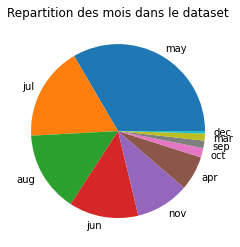

In [146]:
months = df["month"].value_counts()
plt.pie(months,labels=months.index)
plt.title("Repartition des mois dans le dataset")
plt.show()

- pandas fournit également des primitives pour les graphes usuels
    - petit jeu : au vu de l'allure du graphe, emmettez des hypothèses sur la bibliothèque auquel il fait appel derriere

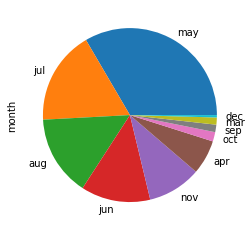

In [144]:
df.month.value_counts().plot(kind='pie')
plt.show()

Considérations pratiques :
- variables catégorielles ou discrètes
- gardez-le lisibles, et fusionnez les catégories trop petites en catégories plus grandes s'il y en a trop
- comme toujours, le bon graphe dépend du public auquel il est adressé
- le pieplot est un graphe qui parle en général facilement aux métiers non scientifiques
- que ce soit pandas ou seaborn, on peut manipuler le graphe avant de l'afficher avec les primitives matplotlib pour le modifier au besoin

#### L'histogramme

- Il est plus précis que le pieplot, comme il affaiche les valeurs exactes
- Peut être le graphe le plus utilisé
- Peut facilement être utilisé pour des variables continues, discrétisés sur les intervalles appelées "bin"

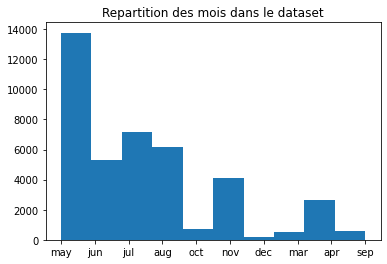

In [153]:
plt.hist(df["month"])
plt.title("Repartition des mois dans le dataset")
plt.show()

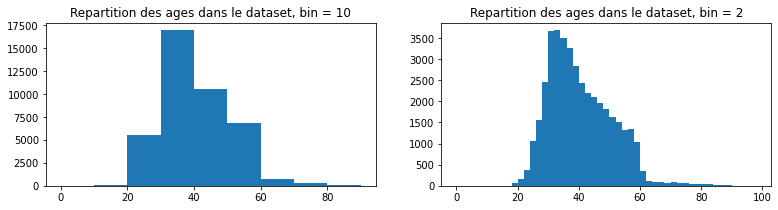

In [165]:
fig, (ax1, ax2) = plt.subplots(figsize=(13, 3), ncols=2)

pos1 = ax1.hist(df["age"],bins=range(0,100,10))
pos2 = ax2.hist(df["age"],bins=range(0,100,2))
ax1.set_title("Repartition des ages dans le dataset, bin = 10")
ax2.set_title("Repartition des ages dans le dataset, bin = 2")
plt.show()

- Attention, un bin trop gros peut nous masquer de l'information

#### Seaborn et displot
- displot permet en une ligne d'afficher ou de comparer les frequences d'une ou plusieurs colonnes d'un dataframe
- il peut bien sur faire un histogramme

Text(0.5, 1.0, 'Repartition des ages dans le dataset')

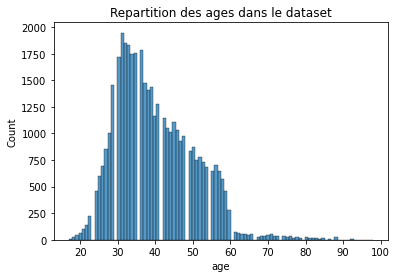

In [190]:
sbn.histplot(df["age"])
plt.title("Repartition des ages dans le dataset")

- seaborn a génnéralement des graphes plus jolis
- le bins doit parfois être réglé pour que le histplot de seaborn fonctionne correctement

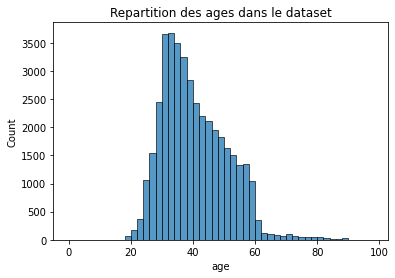

In [191]:
sbn.histplot(df["age"], bins=range(0,100,2))
plt.title("Repartition des ages dans le dataset")
plt.show()

- afficher la courbe de la distribution pour une distribution continue

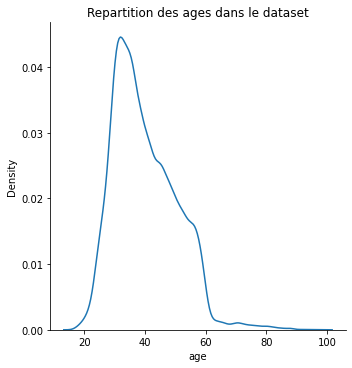

In [193]:
sbn.displot(df["age"], kind="kde")
plt.title("Repartition des ages dans le dataset")
plt.show()

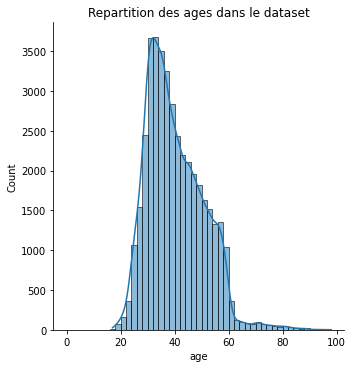

In [194]:
sbn.displot(df["age"], bins=range(0,100,2), kde=True)
plt.title("Repartition des ages dans le dataset")
plt.show()

- Comparer au sein du même graphe par rapport à la valeur du label ou a une autre colonne

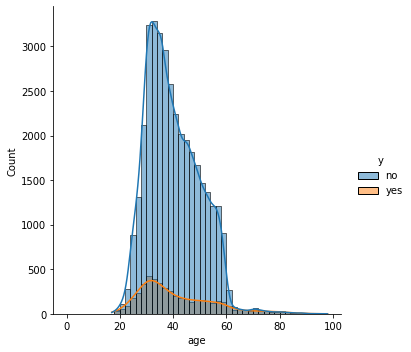

In [196]:
sbn.displot(data=df, x="age", hue="y", bins=range(0,100,2), kde=True)
plt.show()

- comparer sur plusieurs graphes

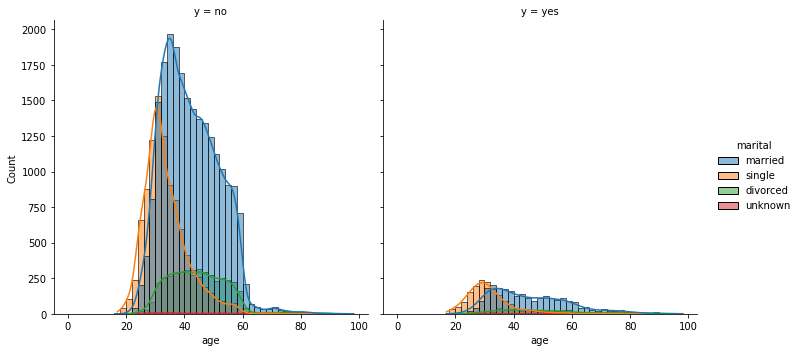

In [197]:
sbn.displot(data=df, x="age", col="y",hue='marital', bins=range(0,100,2), kde=True)
plt.show()

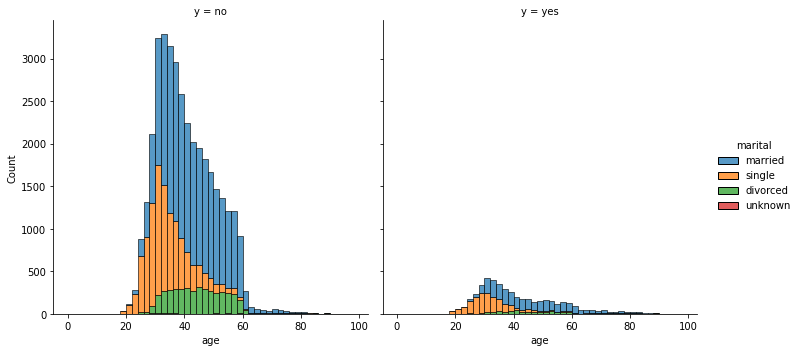

In [199]:
sbn.displot(data=df, x="age", col="y",hue='marital', bins=range(0,100,2),multiple="stack")
plt.show()

- En deux dimensions :

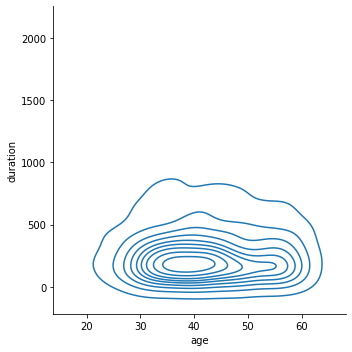

In [216]:
sbn.displot(data=df[:1000], x="age", y="duration", kind="kde")

#### Le boxplot ("la boite à moustache" en français)
- visualise la répartition de la distribution
- permet de voir immédiatement certains outliers ou de comparer la distribution des colonnes

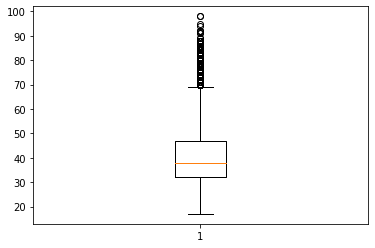

In [224]:
plt.boxplot(df.age)
plt.show()

- en pratique je prefere celui de seaborn

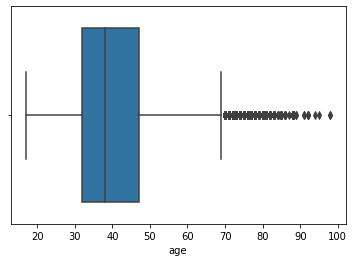

In [223]:
sbn.boxplot(x="age",data=df)
plt.show()

On peut faire les mêmes comparaison que vu au dessus

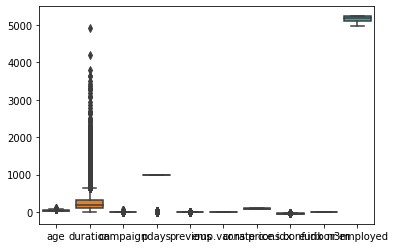

In [256]:
sbn.boxplot(data=df)
plt.show()

- et c'est aussi pour voir quelquechose dans ces graphes qu'on aime bien des données normalisées...

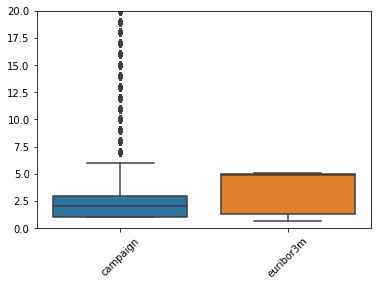

In [255]:
sbn.boxplot(data=df[["campaign","euribor3m"]])
plt.ylim(0,20)
plt.xticks(rotation=45)
plt.show()

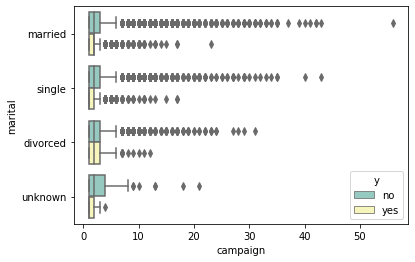

In [266]:
ax = sbn.boxplot(x="campaign", y="marital", hue="y", 
                 data=df, palette="Set3")
plt.show()

#### Le violinplot
- Similaire au boxplot
- La largeur indique le nombre d'individu avec cette valeur
- Ne détecte pas arbitrairement des outliers
- Evite d'être biaisé par le boxplot
    - lorsque la distribution est multimodale par exemple

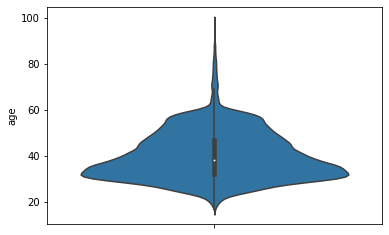

In [275]:
sbn.violinplot(data=df, y="age")
plt.show()

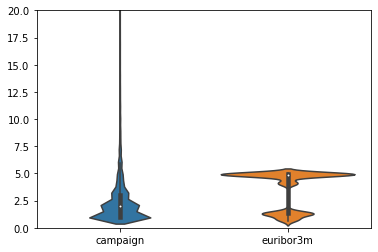

In [276]:
sbn.violinplot(data=df[["campaign","euribor3m"]])
plt.ylim(0,20)
plt.show()

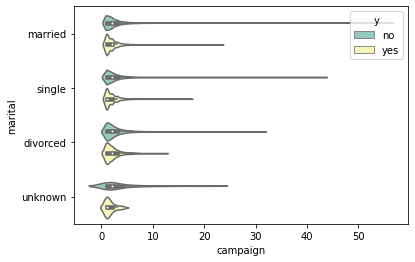

In [277]:
ax = sbn.violinplot(x="campaign", y="marital", hue="y", 
                 data=df, palette="Set3")
plt.show()

#### Le scatterplot

- Affiche les points
- Très utilisé pour des features continues, par exemple pour visualiser apres une pca

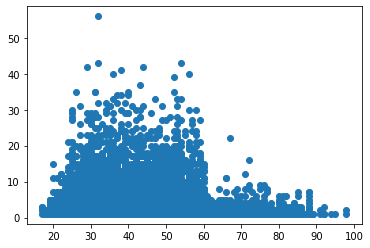

In [279]:
plt.scatter(df["age"], df["duration"])

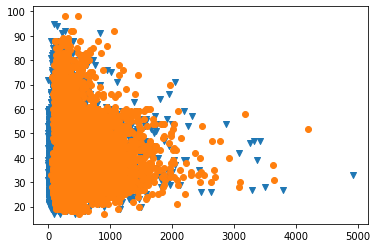

In [291]:
plt.scatter(df[df["y"]=="no"]["duration"], df[df["y"]=="no"]["age"],marker='v')
plt.scatter(df[df["y"]=="yes"]["duration"], df[df["y"]=="yes"]["age"],marker='o')
plt.show()

- si on ne crée pas de subplots, les deux plots sont dans le même graphe

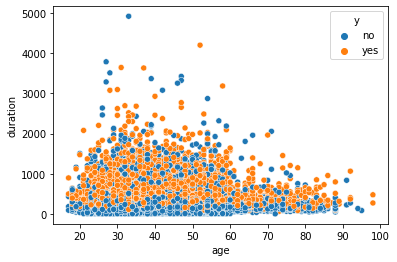

In [294]:
sbn.scatterplot(data=df, x="age", y="duration", hue="y")
plt.show()

- on peut utiliser les formes et les couleurs pour encoder des informations
    - mais à éviter s'il y a trop de points
    - toujours privilégier les colonnes avec moins de valeur sur la forme, comme elle est plus dure à lire

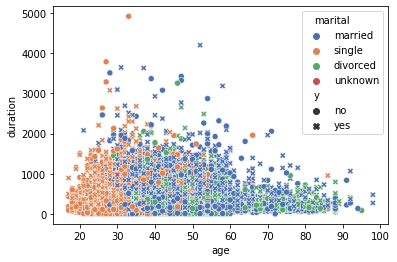

In [301]:
sbn.scatterplot(data=df, x="age", y="duration", hue="marital",style="y",palette="deep")
plt.show()

- c'est souvent plus rapidement joli avec seaborn
- les palettes vues précédemments peuvent être utilisées
    - seaborn filtre pour diminuer la caractère vif des couleurs, du coup il faut utiliser des filtres de couleurs
        "flashy" pour avoir un bon rendu avec seaborn

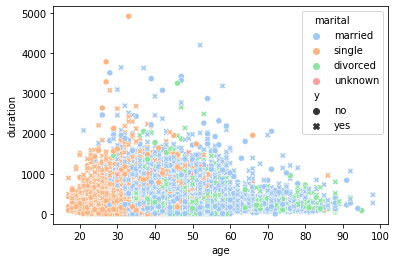

In [304]:
sbn.scatterplot(data=df, x="age", y="duration", hue="marital",style="y",palette="pastel")
plt.show()

#### Le lineplot pour les series temporelles

- équivalent du plot() de matplotlib, mais avec les fonctionalités habituelles de pandas

<AxesSubplot:xlabel='age', ylabel='cos'>

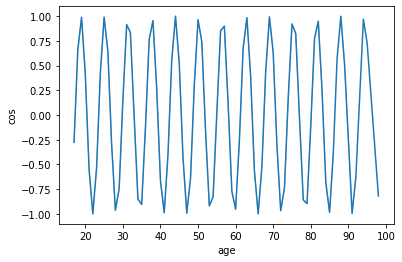

In [311]:
df["cos_age"] = np.cos(df["age"])
sbn.lineplot(data=df,x="age", y="cos")

<AxesSubplot:xlabel='age', ylabel='cos'>

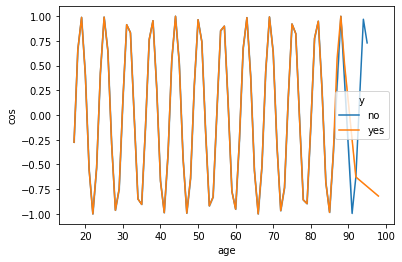

In [314]:
df["cos_age"] = np.cos(df["age"])
sbn.lineplot(data=df,x="age", y="cos", hue="y")

# Et pour des visualisation plus poussées ?
### - vidéos : opencv (qt, mais supporte mal tout les systeme d'exploitations), serveur/client dash/flask (important travail d'implémentation)
### - interactives: mpl3d (lourd), plotly, streamlit (prometteur mais jeune)
    - visualisations animées : mpl3d, matplotlib (mais les deux sont peu pratiques), plotly ou streamlit
### - sous forme de jeu ? pygames